An observational technique to determine the amount of freshwater in a region is to compare a reference "open ocean" salinity to the average salinity, and calculate how much freshwater would need to be added to that region to achieve the resultant average salinity. This process can be flipped to compare with the results I am getting for freshwater content, i.e. using the average salinity and amount of freshwater to calculate a reference salinity of the "open ocean" or ocean water entering the region.

$F_w = \int{\frac{(S_{ref} - S_A)}{S_{ref}} dz}$

$m_{fw} = H - \frac{1}{S_{ref}} \int_0^H{S_A}dz$

I am not sure how to deal with depth here, but I'm thinking that H doesn't necessarily need to be the full depth? As long as it's adequately below the halocline to capture the saltiest water, I don't think it needs to go all the way down?

A good reference to have in mind for this part is this: https://journals.ametsoc.org/view/journals/phoc/49/9/jpo-d-19-0102.1.xml
Argues that freshwater content is not useful in physical oceanography because of ambiguous reference salinity; I can counter-argue and say that using a model to get a real value for this is maybe a better use of this metric. Also, there are some good references in the introduction of this paper that I should bring into my introduction.

In [89]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
from salishsea_tools import viz_tools

In [90]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

In [146]:
def make_profile_ts(ds, reg_list):
    all_ts = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).mean(dim='gridY', skipna=True).mean(dim='gridX', skipna=True)
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).mean(dim='gridY', skipna=True).mean(dim='gridX', skipna=True)
        all_ts = (all_ts + next) / 2
        # print(region)

    return all_ts

In [92]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]
tmask = tmask.rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
mmask = 1 - tmask

In [93]:
fwsum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
fwsum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
fwsum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
fwsum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
fwsum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [94]:
fw_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))
fw_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
fw_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
fw_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
fw_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))

In [95]:
phys_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2023, 2023)).where(mmask)
phys_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2022, 2022)).where(mmask)
phys_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2021, 2021)).where(mmask)
phys_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2020, 2020)).where(mmask)
phys_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2019, 2019)).where(mmask)

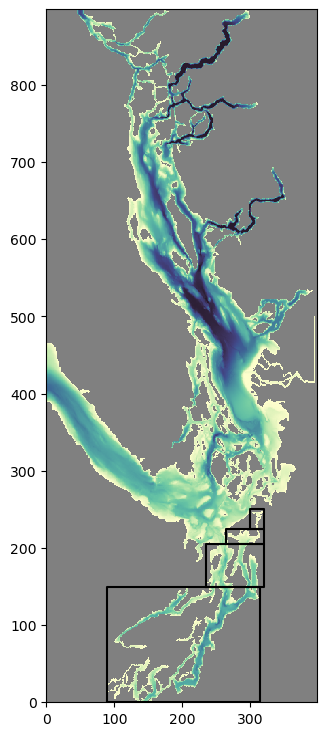

In [96]:
## my boxes
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);
PS_main = [0, 150, 90, 315]
plot_box(ax, PS_main, 'k')
PS_AIWB = [150, 205, 235, 320]
plot_box(ax, PS_AIWB, 'k')
PS_WB = [205, 225, 265, 320]
plot_box(ax, PS_WB, 'k')
PS_DP = [225, 250, 300, 320]
plot_box(ax, PS_DP, 'k')

PS_all = [PS_main, PS_AIWB, PS_WB, PS_DP]

In [147]:
phys_prof_2023 = make_profile_ts(phys_2023_mon, PS_all)
phys_prof_2022 = make_profile_ts(phys_2022_mon, PS_all)
phys_prof_2021 = make_profile_ts(phys_2021_mon, PS_all)
phys_prof_2020 = make_profile_ts(phys_2020_mon, PS_all)
phys_prof_2019 = make_profile_ts(phys_2019_mon, PS_all)

In [148]:
phys_prof_all = xr.concat([phys_prof_2019, phys_prof_2020, phys_prof_2021, phys_prof_2022, phys_prof_2023], dim='time')

Text(0.5, 1.0, 'Puget Sound avg Temperature')

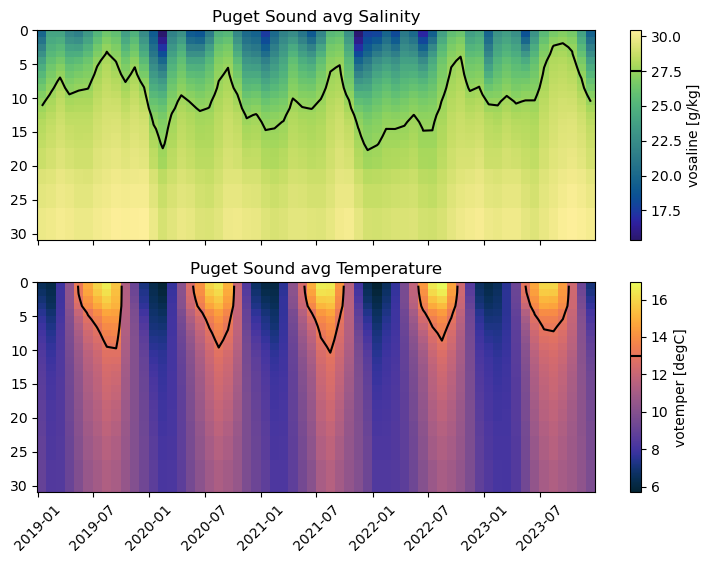

In [183]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
colormesh1 = ax[0].pcolormesh(phys_prof_all['time'], phys_prof_all['depth'], phys_prof_all['vosaline'].T, cmap=cm.haline)
ax[0].set_ylim([31, 0])
cb1 = fig.colorbar(colormesh1, ax=ax[0], label='vosaline [g/kg]')
cont1 = ax[0].contour(phys_prof_all['time'], phys_prof_all['depth'], phys_prof_all['vosaline'].T, [27.5], colors='black')
cb1.add_lines(cont1)
ax[0].set_title('Puget Sound avg Salinity')

colormesh2 = ax[1].pcolormesh(phys_prof_all['time'], phys_prof_all['depth'], phys_prof_all['votemper'].T, cmap=cm.thermal)
ax[1].set_ylim([31, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[1], label='votemper [degC]')
cont2 = ax[1].contour(phys_prof_all['time'], phys_prof_all['depth'], phys_prof_all['votemper'].T, [13], colors='black')
cb2.add_lines(cont2)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title('Puget Sound avg Temperature')

Text(0.5, 1.0, 'Puget Sound avg Temperature')

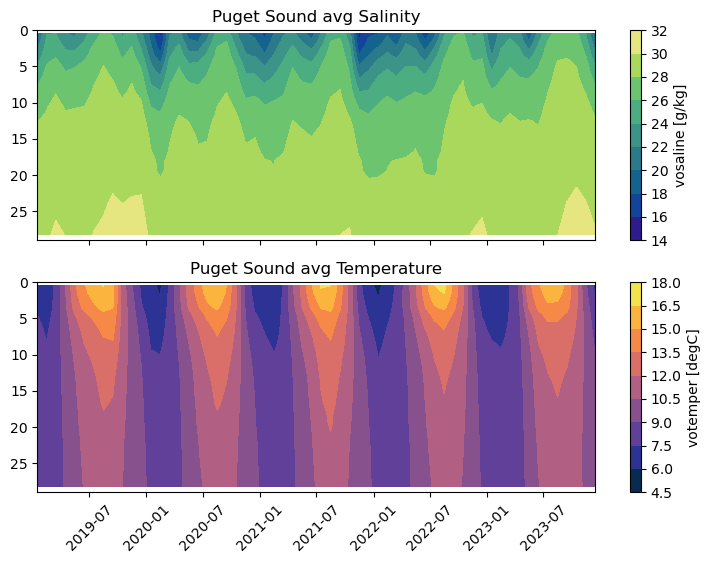

In [187]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
colormesh1 = ax[0].contourf(phys_prof_all['time'], phys_prof_all['depth'], phys_prof_all['vosaline'].T, cmap=cm.haline)
ax[0].set_ylim([29, 0])
cb1 = fig.colorbar(colormesh1, ax=ax[0], label='vosaline [g/kg]')
# cont1 = ax[0].contour(phys_prof_all['time'], phys_prof_all['depth'], phys_prof_all['vosaline'].T, [27.5], colors='black')
# cb1.add_lines(cont1)
ax[0].set_title('Puget Sound avg Salinity')

colormesh2 = ax[1].contourf(phys_prof_all['time'], phys_prof_all['depth'], phys_prof_all['votemper'].T, cmap=cm.thermal)
ax[1].set_ylim([29, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[1], label='votemper [degC]')
# cont2 = ax[1].contour(phys_prof_all['time'], phys_prof_all['depth'], phys_prof_all['votemper'].T, [13], colors='black')
# cb2.add_lines(cont2)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title('Puget Sound avg Temperature')

Now I need to figure out how to get the average of the salinity over the whole area... salinity is given in g/kg. The volumes of each box is something I can calculate pretty easily, but should do it in a different script if I'm going to multiply just like the freshwater volume. I can turn volume into kg using the density of freshwater? I can also do a weighted average using the volume of each box and the total volume? I need to figure out how exactly this calculation works to be able to go through with it I think, since it will make it easier or harder depending on the method for each. Is H the full depth, or just one that I pick? Should I pick 32 meters then?

OK, I've bungled myself a bit. S_A is actually the absolute salinity, not the average salinity. This makes sense with the integral, and what's left for me to do is to discretize the integral.